In [1]:
import sys
sys.path.insert(0,'/Users/tiagorodrigues/Documents/GitHub/NeuroKit')

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import neurokit2 as nk

# relative imports of the singal quality indexes
import SQIs
from SQIs.models import ZZ2018, GD2011

## Signal Quality Index

Following the approach by: 
1. Zhao Z, Zhang Y. SQI quality evaluation mechanism of single-lead ECG signal based on simple heuristic fusion and fuzzy comprehensive evaluation. Front Physiol. 2018;9(JUN):1–13. 

### Simple classifier (qSQI, pSQI, kSQI, basSQI)

In [2]:
# divide the signal in epoches
def split_padded(a,n):
    padding = (-len(a))%n
    return np.split(np.concatenate((a,np.zeros(padding))),n)

/Users/tiagorodrigues/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/tiagorodrigues/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/tiagorodrigues/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/tiagorodrigues/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/tiagorodrigues/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


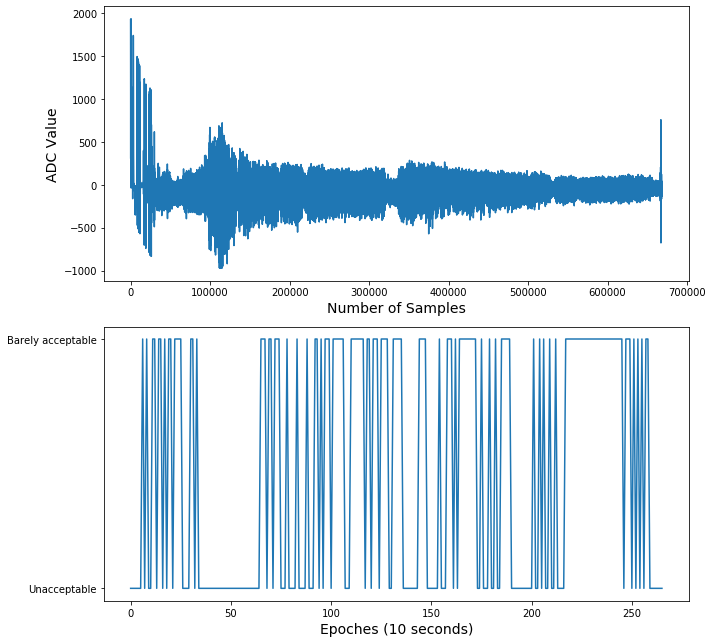

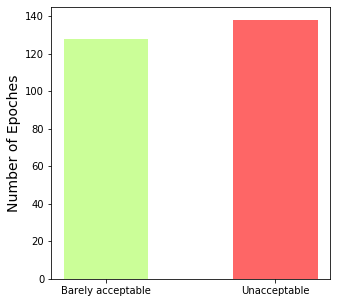

In [3]:
# Read ECG data
data = pd.read_csv('/Users/tiagorodrigues/OneDrive - Universidade de Lisboa/TiagoRodrigues_EPFL_FieldWiz_tese_2020/Data/Activities/20200205-TR-FWv1.txt', sep=" ", header=4)
data.columns = ["ECG"]


# Split ECG into 10s epochs
fs = 250 
number_epochs = int(len(data['ECG']) / (10*fs))
ecg_epochs = split_padded(data['ECG'], number_epochs)


result = []
for ecg10s in ecg_epochs[:-1]:

    # Find R_Peaks using Kalidas 2017 and rodrigues2020
    rpeaks_kalidas = nk.ecg_findpeaks(5,5,nk.ecg_clean(ecg10s, method="neurokit"), method="kalidas2017")['ECG_R_Peaks']
    rpeaks_rodrigues2020 = nk.ecg_findpeaks(5,5, nk.ecg_clean(ecg10s, method="neurokit"), method="engzee")['ECG_R_Peaks']


    result.append(ZZ2018.ZZ2018(ecg10s, rpeaks_kalidas, rpeaks_rodrigues2020, fs=250, search_window=5, nseg=1024, mode='simple'))
    

# Plot the results 
plt.subplots(figsize=(10,13))
plt.tight_layout()
plt.subplot(311)
plt.plot(data)
plt.ylabel('ADC Value',fontsize=14)
plt.xlabel('Number of Samples',fontsize=14)

plt.subplot(312)
plt.plot(result)
plt.xlabel('Epoches (10 seconds)',fontsize=14)
plt.tight_layout()
plt.show()

result
plt.subplots(figsize=(5,5))
keys, counts = np.unique(result, return_counts=True)
plt.bar(keys, counts, color = [(204/256,255/256,153/256),(255/256,102/256,102/256)],width = 0.5,align='center')
plt.ylabel('Number of Epoches',fontsize=14)
plt.show()

In [4]:
B = counts[0]/sum(counts) *100
U = counts[1]/sum(counts) *100

print('B =' + np.array2string(B))
print('U =' + np.array2string(U))

B =48.12030075
U =51.87969925


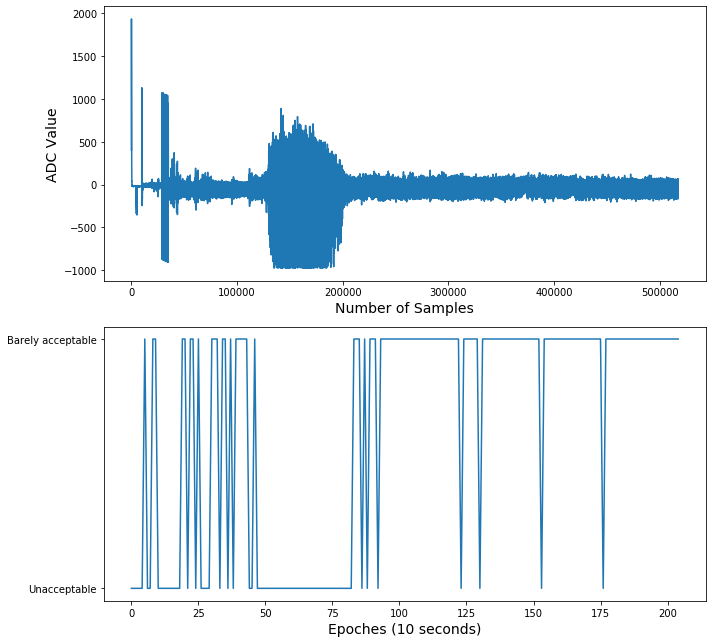

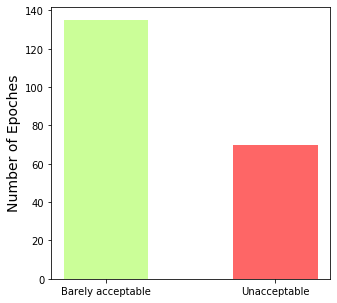

In [5]:
# Read ECG data
data = pd.read_csv('/Users/tiagorodrigues/OneDrive - Universidade de Lisboa/TiagoRodrigues_EPFL_FieldWiz_tese_2020/Data/Activities/20200301-TR-FWv2.txt', sep=" ", header=4)
data.columns = ["ECG"]


# Split ECG into 10 s epochs
fs = 250 
number_epochs = int(len(data['ECG']) / (10*fs))
ecg_epochs = split_padded(data['ECG'], number_epochs)


result = []
for ecg10s in ecg_epochs[:-1]:

    # Find R_Peaks using Kalidas 2017 and rodrigues2020
    rpeaks_kalidas = nk.ecg_findpeaks(5,5,nk.ecg_clean(ecg10s, method="neurokit"), method="kalidas2017")['ECG_R_Peaks']
    rpeaks_rodrigues2020 = nk.ecg_findpeaks(5,5,nk.ecg_clean(ecg10s, method="neurokit"), method="engzee")['ECG_R_Peaks']


    result.append(ZZ2018.ZZ2018(ecg10s, rpeaks_kalidas, rpeaks_rodrigues2020, fs=250, search_window=5, nseg=1024, mode='simple'))
    

# Plot the results 
plt.subplots(figsize=(10,13))
plt.tight_layout()
plt.subplot(311)
plt.plot(data)
plt.ylabel('ADC Value',fontsize=14)
plt.xlabel('Number of Samples',fontsize=14)

plt.subplot(312)
plt.plot(result)
plt.xlabel('Epoches (10 seconds)',fontsize=14)
plt.tight_layout()
plt.show()

result
plt.subplots(figsize=(5,5))
keys, counts = np.unique(result, return_counts=True)
plt.bar(keys, counts, color = [(204/256,255/256,153/256),(255/256,102/256,102/256)],width = 0.5,align='center')
plt.ylabel('Number of Epoches',fontsize=14)
plt.show()

In [6]:
B = counts[0]/sum(counts)*100
U = counts[1]/sum(counts)*100

print('B =' + np.array2string(B))
print('U =' + np.array2string(U))

B =65.85365854
U =34.14634146


### No water -  20200420-JT-FWv2.txt
### Water - 20200421-JT-FWv2.txt
### Gel - 20200422-JT-FWv2.txt

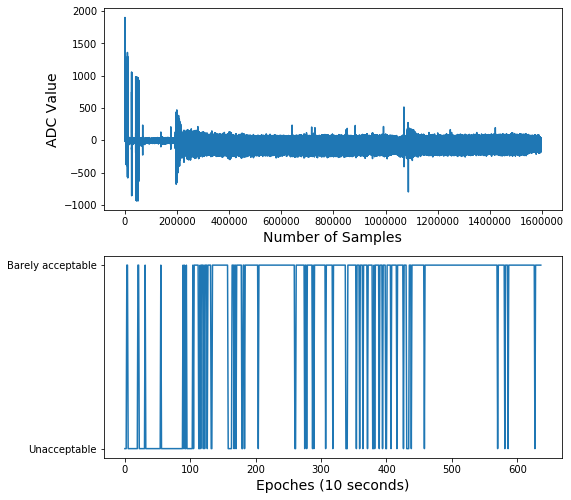

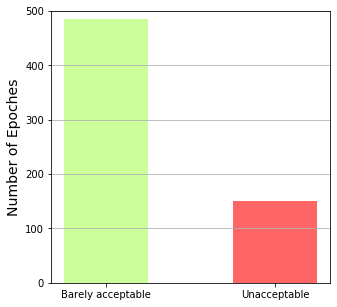

In [25]:
# Read ECG data
data = pd.read_csv('/Users/tiagorodrigues/OneDrive - Universidade de Lisboa/TiagoRodrigues_EPFL_FieldWiz_tese_2020/Data/Activities/20200420-JT-FWv2.txt', sep=" ", header=4)
data.columns = ["ECG"]


# Split ECG into 10 s epochs
fs = 250 
number_epochs = int(len(data['ECG']) / (10*fs))
ecg_epochs = split_padded(data['ECG'], number_epochs)


result = []
for ecg10s in ecg_epochs[:-1]:

    # Find R_Peaks using Kalidas 2017 and rodrigues2020
    rpeaks_kalidas = nk.ecg_findpeaks(5,5,nk.ecg_clean(ecg10s, method="neurokit"), method="kalidas2017")['ECG_R_Peaks']
    rpeaks_rodrigues2020 = nk.ecg_findpeaks(5,5,nk.ecg_clean(ecg10s, method="neurokit"), method="engzee")['ECG_R_Peaks']


    result.append(ZZ2018.ZZ2018(ecg10s, rpeaks_kalidas, rpeaks_rodrigues2020, fs=250, search_window=5, nseg=1024, mode='simple'))
    

# Plot the results 
plt.subplots(figsize=(8,10))
plt.tight_layout()
plt.subplot(311)
plt.plot(data)
plt.ylabel('ADC Value',fontsize=14)
plt.xlabel('Number of Samples',fontsize=14)

plt.subplot(312)
plt.plot(result)
plt.xlabel('Epoches (10 seconds)',fontsize=14)
plt.tight_layout()
plt.show()

result
plt.subplots(figsize=(5,5))
plt.ylim(0, 500)
plt.grid(axis='y')
keys, counts = np.unique(result, return_counts=True)
plt.bar(keys, counts, color = [(204/256,255/256,153/256),(255/256,102/256,102/256)],width = 0.5,align='center')
plt.ylabel('Number of Epoches',fontsize=14)
plt.show()

In [26]:
B = counts[0]/sum(counts)*100
U = counts[1]/sum(counts)*100

print('B =' + np.array2string(B))
print('U =' + np.array2string(U))

B =76.29513344
U =23.70486656


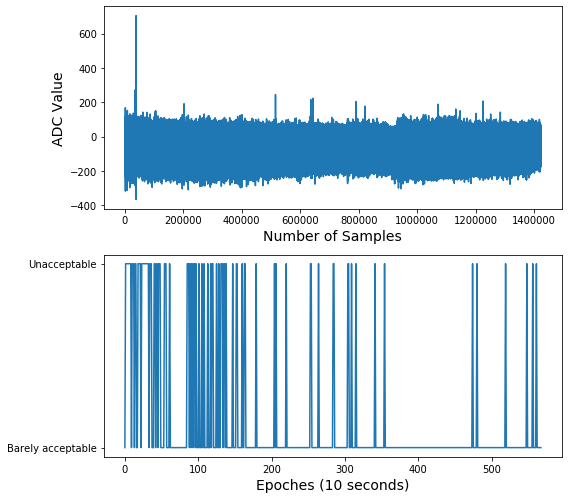

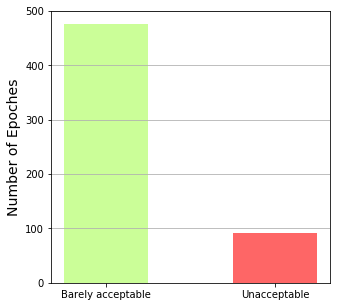

In [27]:
# Read ECG data
data = pd.read_csv('/Users/tiagorodrigues/OneDrive - Universidade de Lisboa/TiagoRodrigues_EPFL_FieldWiz_tese_2020/Data/Activities/20200421-JT-FWv2.txt', sep=" ", header=4)
data.columns = ["ECG"]


# Split ECG into 10 s epochs
fs = 250 
number_epochs = int(len(data['ECG']) / (10*fs))
ecg_epochs = split_padded(data['ECG'], number_epochs)


result = []
for ecg10s in ecg_epochs[:-1]:

    # Find R_Peaks using Kalidas 2017 and rodrigues2020
    rpeaks_kalidas = nk.ecg_findpeaks(5,5,nk.ecg_clean(ecg10s, method="neurokit"), method="kalidas2017")['ECG_R_Peaks']
    rpeaks_rodrigues2020 = nk.ecg_findpeaks(5,5,nk.ecg_clean(ecg10s, method="neurokit"), method="engzee")['ECG_R_Peaks']


    result.append(ZZ2018.ZZ2018(ecg10s, rpeaks_kalidas, rpeaks_rodrigues2020, fs=250, search_window=5, nseg=1024, mode='simple'))
    

# Plot the results 
plt.subplots(figsize=(8,10))
plt.tight_layout()
plt.subplot(311)
plt.plot(data)
plt.ylabel('ADC Value',fontsize=14)
plt.xlabel('Number of Samples',fontsize=14)

plt.subplot(312)
plt.plot(result)
plt.xlabel('Epoches (10 seconds)',fontsize=14)
plt.tight_layout()
plt.show()

result
plt.subplots(figsize=(5,5))
plt.ylim(0, 500)
plt.grid(axis='y')
keys, counts = np.unique(result, return_counts=True)
plt.bar(keys, counts, color = [(204/256,255/256,153/256),(255/256,102/256,102/256)],width = 0.5,align='center')
plt.ylabel('Number of Epoches',fontsize=14)
plt.show()

In [28]:
B = counts[0]/sum(counts)*100
U = counts[1]/sum(counts)*100

print('B =' + np.array2string(B))
print('U =' + np.array2string(U))

B =83.8028169
U =16.1971831


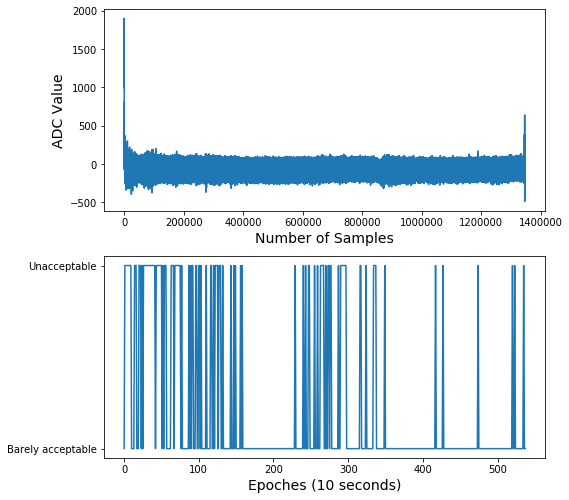

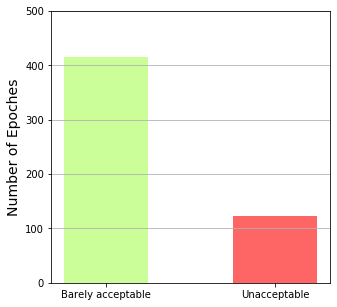

In [29]:
# Read ECG data
data = pd.read_csv('/Users/tiagorodrigues/OneDrive - Universidade de Lisboa/TiagoRodrigues_EPFL_FieldWiz_tese_2020/Data/Activities/20200422-JT-FWv2.txt', sep=" ", header=4)
data.columns = ["ECG"]


# Split ECG into 10 s epochs
fs = 250 
number_epochs = int(len(data['ECG']) / (10*fs))
ecg_epochs = split_padded(data['ECG'], number_epochs)


result = []
for ecg10s in ecg_epochs[:-1]:

    # Find R_Peaks using Kalidas 2017 and rodrigues2020
    rpeaks_kalidas = nk.ecg_findpeaks(5,5,nk.ecg_clean(ecg10s, method="neurokit"), method="kalidas2017")['ECG_R_Peaks']
    rpeaks_rodrigues2020 = nk.ecg_findpeaks(5,5,nk.ecg_clean(ecg10s, method="neurokit"), method="engzee")['ECG_R_Peaks']


    result.append(ZZ2018.ZZ2018(ecg10s, rpeaks_kalidas, rpeaks_rodrigues2020, fs=250, search_window=5, nseg=1024, mode='simple'))
    

# Plot the results 
plt.subplots(figsize=(8,10))
plt.tight_layout()
plt.subplot(311)
plt.plot(data)
plt.ylabel('ADC Value',fontsize=14)
plt.xlabel('Number of Samples',fontsize=14)

plt.subplot(312)
plt.plot(result)
plt.xlabel('Epoches (10 seconds)',fontsize=14)
plt.tight_layout()
plt.show()

result
plt.subplots(figsize=(5,5))
plt.ylim(0, 500)
plt.grid(axis='y')
keys, counts = np.unique(result, return_counts=True)
plt.bar(keys, counts, color = [(204/256,255/256,153/256),(255/256,102/256,102/256)],width = 0.5,align='center')
plt.ylabel('Number of Epoches',fontsize=14)
plt.show()



In [32]:
B = counts[0]/sum(counts)*100
U = counts[1]/sum(counts)*100

print('B =' + np.array2string(B))
print('U =' + np.array2string(U))

B =77.13754647
U =22.86245353
